# Proyek Analisis Data: Bike Sharing
- **Nama:** Wicaksono Hanif Supriyanto
- **Email:** hanif.supriyanto23@gmail.com
- **ID Dicoding:** wicaksonohanif

## Menentukan Pertanyaan Bisnis

- Kapan waktu peminjaman sepeda yang paling ramai?
- Bagaimana pengaruh kondisi cuaca dan musim terhadap jumlah sepeda yang disewa?

## Import Semua Packages/Library yang Digunakan

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat tabel dengan basis jam (hour)

In [72]:
df_hour = pd.read_csv('data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [73]:
print("Jumlah baris dan kolom: ", df_hour.shape) 

Jumlah baris dan kolom:  (17379, 17)


**Dataset memiliki kolom-kolom sebagai berikut:**
- `instant`: Indeks data.
- `dteday`: Tanggal.
- `season`: Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin).
- `yr`: Tahun (0: 2011, 1: 2012).
- `mnth`: Bulan (1-12).
- `hr`: Jam (0-23, hanya ada di hour.csv).
- `holiday`: Apakah hari tersebut hari libur (0: Tidak, 1: Ya).
- `weekday`: Hari dalam seminggu.
- `workingday`: Apakah hari tersebut adalah hari kerja (0: Tidak, 1: Ya).
- `weathersit`: Kondisi cuaca (1-4, semakin besar, semakin buruk cuacanya).
- `temp`: Suhu normalisasi dalam Celsius (dibagi 41).
- `atemp`: Suhu yang dirasakan (dibagi 50).
- `hum`: Kelembaban (dibagi 100).
- `windspeed`: Kecepatan angin (dibagi 67).
- `casual`: Jumlah pengguna non-terdaftar.
- `registered`: Jumlah pengguna terdaftar.
- `cnt`: Total jumlah sepeda yang disewa (casual + registered).

**Jumlah baris dan kolom dari masing-masing dataset**
- `day.csv`: 731 baris dan 16 kolom
- `hour.csv`: 17379 baris dan 17 kolom

### Assessing Data

Dataset yang digunakan adalah yang berbasis jam (`df_hour`)

#### Menilai Data df_hour

In [74]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [75]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [76]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


In [77]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Hampir semua kolom bertipe data numerik(int/float) kecuali pada kolom dteday.
- Tidak terdapat data yang hilang maupun terduplikasi.

### Cleaning Data

In [78]:
df_hour.drop_duplicates(inplace=True)

In [79]:
df_hour.dropna(inplace=True)

## Exploratory Data Analysis (EDA)

#### Eksplorasi terkait statistik deskriptif

In [80]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Jumlah sewa terbanyak baik pada kategori registered dan casual adalah 997 sepeda per hari.
- Jumlah sewa paling sedikit baik pada kategori registered dan casual adalah 1 sepeda per hari.
- Jumlah rata-rata sewa baik pada kategori registered dan casual adalah 181 sepeda per hari.

#### Eksplorasi kolom tahun dengan jumlah penyewa

In [81]:
df_hour.groupby(by="yr").cnt.sum()

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

**Insight:**
- Jumlah sewa terbanyak baik pada kategori registered dan casual terjadi pada tahun 2012

#### Eksplorasi kolom bulan dengan jumlah penyewa

In [82]:
df_hour.groupby(by="mnth").cnt.sum().sort_values(ascending=False)

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64

**Insight:**
- Selama 2 tahun, penyewaan paling banyak terjadi di bulan agustus.

#### Eksplorasi kolom hari dengan jumlah penyewa

In [83]:
df_hour.groupby(by="weekday").cnt.sum().sort_values(ascending=False)

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

**Insight:**
- Selama 2 tahun, dalam 1 minggu, penyewaan paling banyak terjadi di hari sabtu.

#### Eksplorasi kolom jam dengan jumlah penyewa

In [84]:
df_hour.groupby(by="hr").cnt.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

**Insight:**
- Penyewaan sepeda paling banyak terjadi pada jam 5 sore.

#### Eksplorasi kolom musim dengan jumlah penyewa

In [85]:
df_hour.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

**Insight:**
- Penyewaan sepeda paling banyak terjadi pada musim gugur, dan paling sedikit terjadi pada musim semi

#### Eksplorasi kolom cuaca dengan jumlah penyewa

In [86]:
df_hour.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

**Insight:**
- Penyewaan sepeda paling banyak terjadi daat cuaca sedang cerah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kapan waktu peminjaman sepeda yang paling ramai?

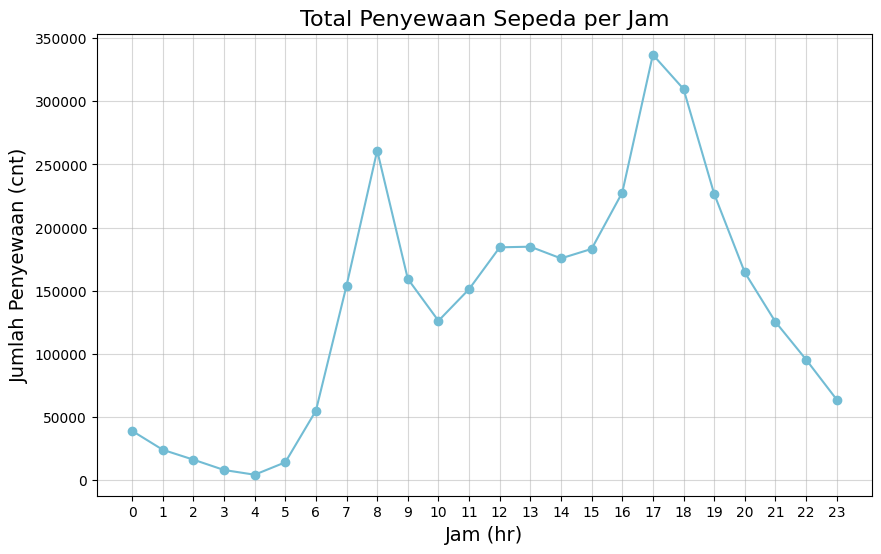

In [87]:
hourly_counts = df_hour.groupby(by="hr").cnt.sum()
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-', color='#72BCD4')
plt.title("Total Penyewaan Sepeda per Jam", fontsize=16)
plt.xlabel("Jam (hr)", fontsize=14)
plt.ylabel("Jumlah Penyewaan (cnt)", fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(range(0, 24))
plt.show()

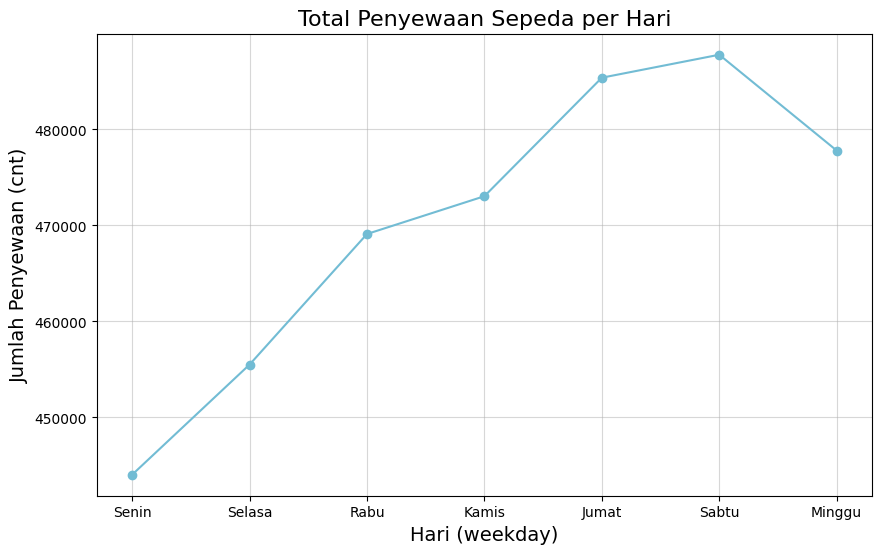

In [88]:
days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

daily_counts = df_hour.groupby(by="weekday").cnt.sum()
plt.figure(figsize=(10, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='#72BCD4')
plt.title("Total Penyewaan Sepeda per Hari", fontsize=16)
plt.xlabel("Hari (weekday)", fontsize=14)
plt.ylabel("Jumlah Penyewaan (cnt)", fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(range(0, 7), labels=days)
plt.show()

**Insight:**
- Berdasarkan visualisasi, terlihat bahwa penyewaan sepeda terbanyak terjadi pada hari sabtu, dengan kurva yang cenderung naik dari hari senin dan mulai menurun pada hari minggu.
- Waktu spesifik penyewaan terbanyak terjadi pada jam 5 sore. Uniknya, penyewaan terus bertambah hingga jam 8 pagi lalu menurun ketika siang hari, dan kembali melonjak pada sore hari. 

### Pertanyaan 2:
Bagaimana pengaruh kondisi cuaca dan musim terhadap jumlah sepeda yang disewa?

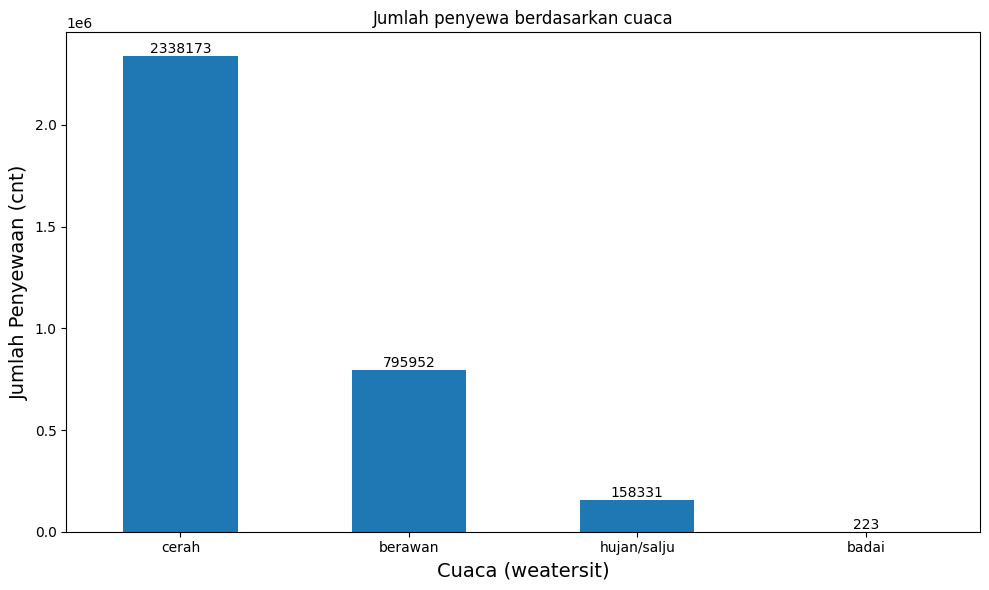

In [89]:
weathers = ['cerah', 'berawan', 'hujan/salju', 'badai']
weatherly_counts = df_hour.groupby(by="weathersit").cnt.sum()
plt.figure(figsize=(10, 6))
weatherly_counts.plot(kind='bar')
plt.title('Jumlah penyewa berdasarkan cuaca')
plt.xlabel('Cuaca (weatersit)', fontsize=14)
plt.ylabel('Jumlah Penyewaan (cnt)', fontsize=14)
for i, count in enumerate(weatherly_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
plt.xticks(range(0, 4), labels=weathers, rotation=0)
plt.tight_layout()
plt.show()

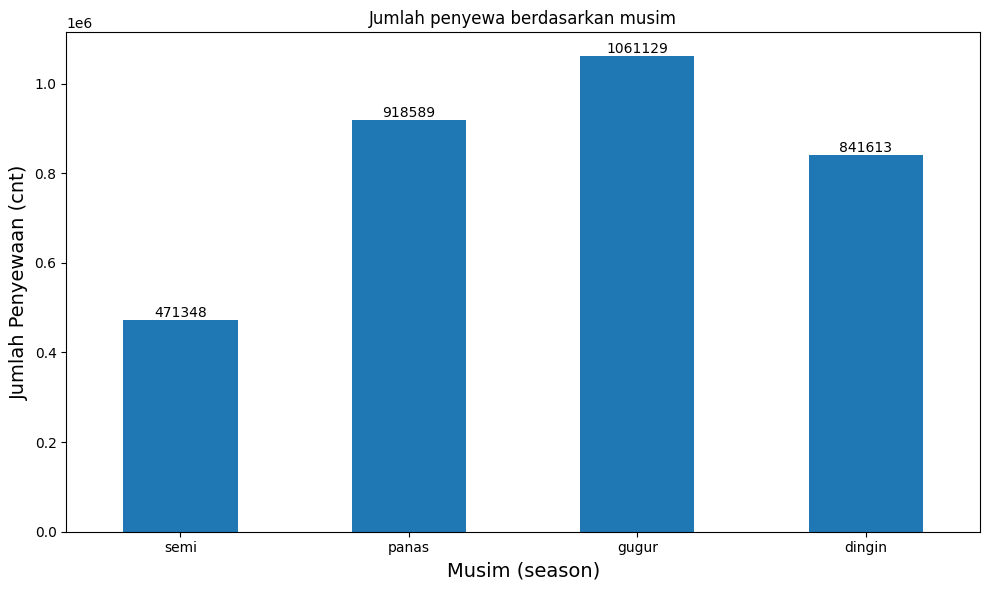

In [90]:
seasons = ['semi', 'panas', 'gugur', 'dingin']
seasonly_counts = df_hour.groupby(by="season").cnt.sum()
plt.figure(figsize=(10, 6))
seasonly_counts.plot(kind='bar')
plt.title('Jumlah penyewa berdasarkan musim')
plt.xlabel('Musim (season)', fontsize=14)
plt.ylabel('Jumlah Penyewaan (cnt)', fontsize=14)
for i, count in enumerate(seasonly_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
plt.xticks(range(0, 4), labels=seasons, rotation=0)
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan visualisasi, hampir dipastikan bahwa kebanyakan orang menyewa sepeda disaat cuaca yang cerah
- Kebanyakan orang lebih sering menyewa sepeda pada musim gugur jika dibandingkan musim lainnya.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:
  Dapat disimpulkan bahwa, selama 2 tahun (2011-2012), demand penyewaan sepeda meningkat pada saat mendekati akhir pekan dan pada akhir pekan. Waktu penyewaan teramai berkisar pada jam 8 pagi dan jam 5 sore.
  
- Conclution pertanyaan 2:
  Dapat disimpulkan bahwa, selama 2 tahun (2011-2012), kondisi cuaca sangat berpengaruh terhadap jumlah penyewaan sepeda, serta musim gugur menjadi musim penyewaan sepeda terbanyak ketimbang musim lainnya.

In [91]:
df_hour.to_csv("all_data.csv", index=False)